In [1]:
%matplotlib inline
#%pylab
from matplotlib.colors import LogNorm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools

In [2]:
raw_df = pd.read_csv('/home/kwierman/Desktop/flash_matching/181/mucs_many_to_one/0/data.txt')
#raw_df = pd.read_csv('csvdata/mucs_ccv_corrected/data_run180_llhd_one_to_many.txt')
#raw_df = pd.read_csv('csvdata/mucs_raw/data_run181_llhd_one_to_many.txt')
#raw_df = pd.read_csv('csvdata/mucs_raw/data_run180_llhd_one_to_many.txt')

raw_df = raw_df.query('not q == inf')

In [3]:
def plot_pe(df,xmin=0.,xmax=1000,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    plt.hist(df.oppe.values,bins=nbins,range=(xmin,xmax),
             color='blue',alpha=0.5,label='OpFlash Reco')
    plt.hist(df.hypope.values,bins=nbins,range=(xmin,xmax),
             color='red',alpha=0.5,label='QLL Hypothesis')
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('Flash PE Sum [PE]',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('Flash PE Distribution',fontsize=24,fontweight='bold')
    plt.show()    
    
def plot_pediff(df,xmin=-500.,xmax=500,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    diff_data = df.hypope.values - df.oppe.values
    print 'mean',diff_data.mean(),'std',diff_data.std()
    plt.hist(diff_data,bins=nbins,range=(xmin,xmax),
             color='blue',alpha=0.5,label='Hypothesis - Reco')
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.xlim(xmin,xmax)
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('Hypothesis - Reco PE-Sum Diff [PE]',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('PE-Sum Difference (Hypothesis - Reco)',fontsize=24,fontweight='bold')
    plt.show()    

def plot_qll(df,xmin=0., xmax=40,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    plt.hist(df.q.values,bins=nbins,range=(xmin,xmax),
             color='blue',alpha=0.5,label='QLL Return Value')
    plt.tick_params(labelsize=20)
    plt.xlim(xmin,xmax)
    plt.grid()
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('Charge Likelihood Value',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('QLL Algorithm Q-Likelihood',fontsize=24,fontweight='bold')
    plt.show()
    
def plot_xxmin(df,xmin=-50,xmax=260,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_x = df.x.values
    orig_x = df.xmin.values - df.t.values * 0.1114359
    plt.hist(res_x,bins=nbins,range=(xmin,xmax),color='blue',alpha=0.5,
            label='QLL Estimated X-min')
    plt.hist(orig_x,bins=nbins,range=(xmin,xmax),color='red',alpha=0.5,
            label='Truth X-Min')
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('X-Min [cm]',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    plt.show()

def plot_xcorr(df,nbinsx,xmin,xmax,nbinsy,ymin,ymax):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_x = df.x.values
    orig_x = df.xmin.values - df.t.values * 0.1114359
    #print orig_x
    plt.hist2d(res_x,orig_x,bins=(nbinsx,nbinsy),
               range=((xmin,xmax),(ymin,ymax)),norm=LogNorm())
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Truth X-Min [cm]',fontsize=20,fontweight='bold')
    plt.xlabel('QLL Estimated X-Min [cm]',fontsize=20,fontweight='bold')
    #leg=plt.legend(fontsize=20,loc=1)
    #leg_frame=leg.get_frame()
    #leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    plt.show()
    
def plot_tcorr(df,nbinsx,xmin,xmax,nbinsy,ymin,ymax):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_t = df.t.values
    orig_t = df.time.values
    print len(res_t)
    print len(orig_t)
    plt.hist2d(res_t,orig_t,bins=(nbinsx,nbinsy),
               range=((xmin,xmax),(ymin,ymax)),norm=LogNorm())
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Truth Time',fontsize=20,fontweight='bold')
    plt.xlabel('Matched Flash Time [us]',fontsize=20,fontweight='bold')
    #leg=plt.legend(fontsize=20,loc=1)
    #leg_frame=leg.get_frame()
    #leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    plt.show()
    
def plot_xscorecorr(df,nbinsx,xmin,xmax,nbinsy,ymin,ymax):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_x = df.x.values
    orig_x = df.xmin.values - df.t.values * 0.1114359
    plt.hist2d(res_x - orig_x,df.q.values,bins=(nbinsx,nbinsy),
               range=((xmin,xmax),(ymin,ymax)),norm=LogNorm())
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('QLL Minimization Variable',fontsize=20,fontweight='bold')
    plt.xlabel('Min X Diff [cm]',fontsize=20,fontweight='bold')
    #leg=plt.legend(fontsize=20,loc=1)
    #leg_frame=leg.get_frame()
    #leg_frame.set_facecolor('white')
    plt.title('X-Min Comparison: QLL Estimate vs. MC',fontsize=24,fontweight='bold')
    plt.show()
    
def plot_tdiff(df,xmin=-100,xmax=100,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    orig_t = df.time.values
    res_t  = df.t.values
    diff_data = orig_t - res_t
    print 'mean',diff_data.mean(),'std',diff_data.std()
    plt.hist(diff_data,bins=nbins,range=(xmin,xmax),
            color='blue',alpha=0.5,label='T0 - Flash Time')
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.xlim(xmin,xmax)
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('Truth - Flash Time [us]',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('Truth - Flash Time Distribution',fontsize=24,fontweight='bold')
    plt.show()
    
def plot_xdiff(df,xmin=-100,xmax=100,nbins=40):
    fig, ax = plt.subplots(figsize=(12, 8),facecolor='w')
    res_x = df.x.values
    orig_x = df.xmin.values - df.t.values * 0.1114359
    diff_data = res_x - orig_x
    print 'mean',diff_data.mean(),'std',diff_data.std()
    plt.hist(diff_data,bins=nbins,range=(xmin,xmax),
             color='blue',alpha=0.5,label='QLL - TPC')
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.ylabel('Matches',fontsize=20,fontweight='bold')
    plt.xlabel('QLL Estimated - TPC X-Min [cm]',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=20,loc=1)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    plt.title('X-Min Diff: QLL - TPC Estimated',fontsize=24,fontweight='bold')
    plt.show()

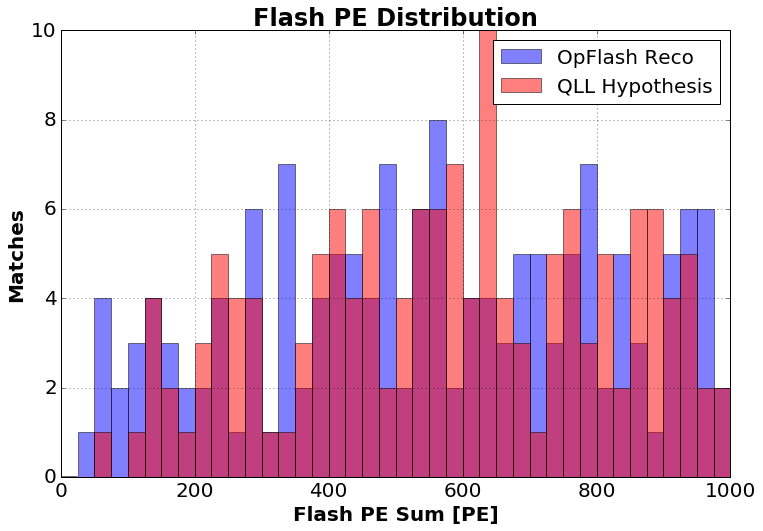

mean nan std nan


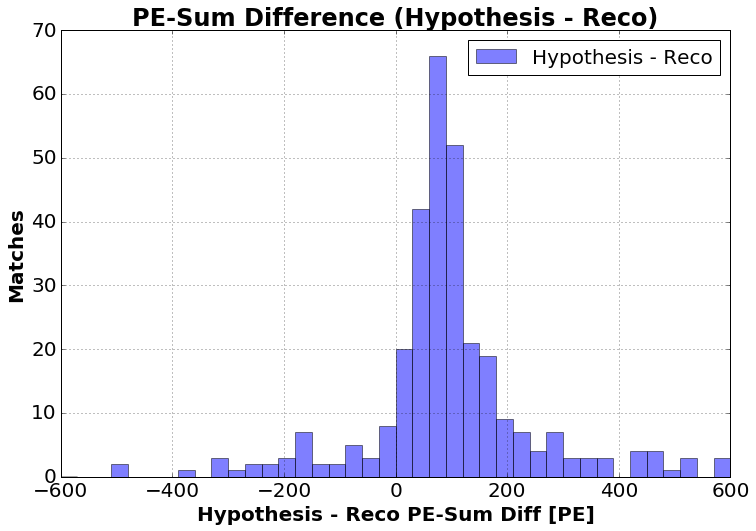

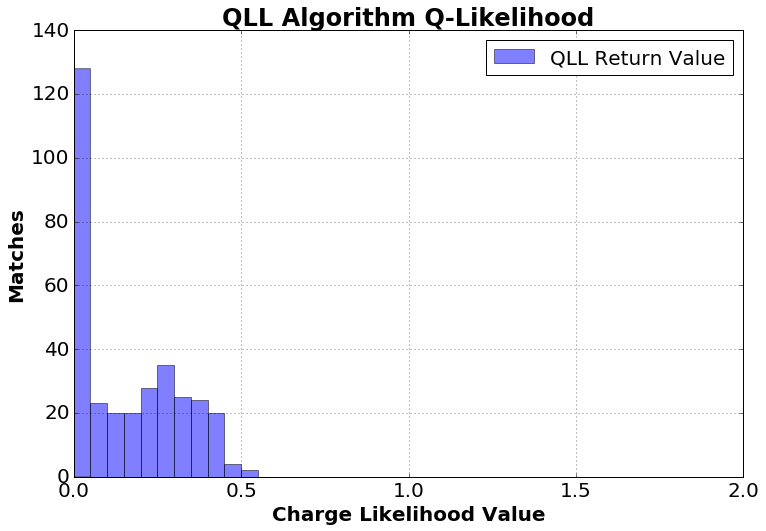

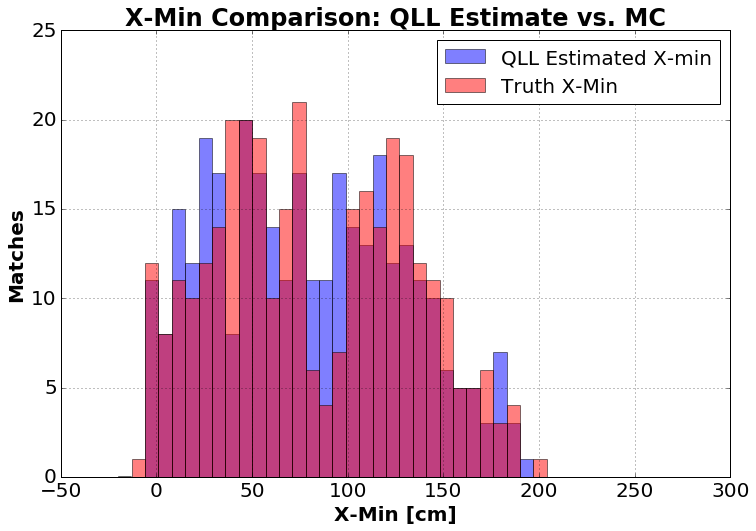

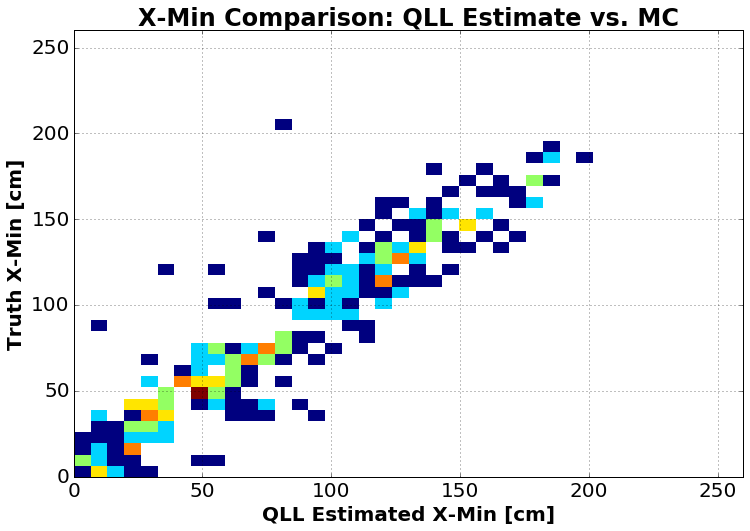

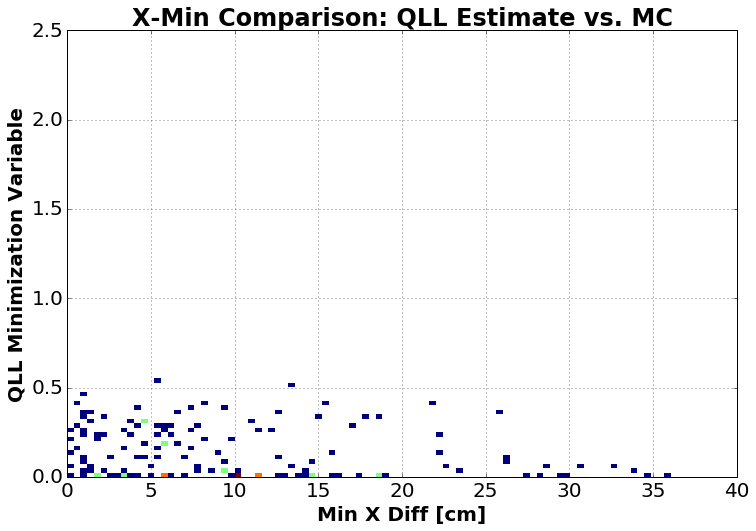

mean -2.97603610235 std 19.5716335048


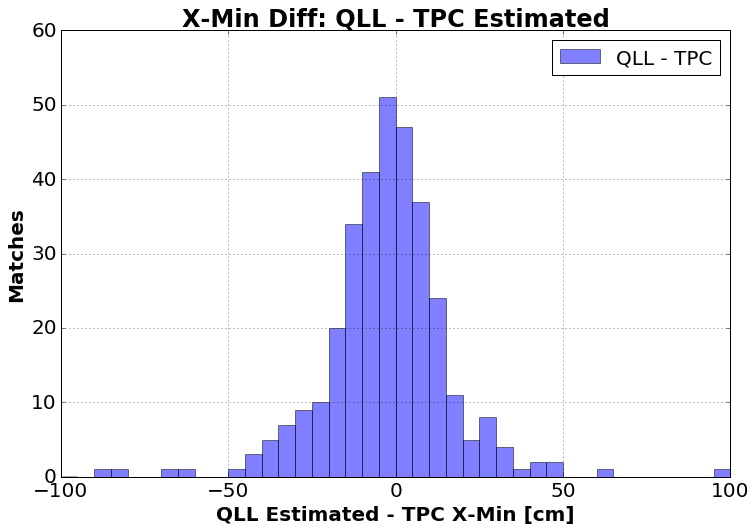

329
329


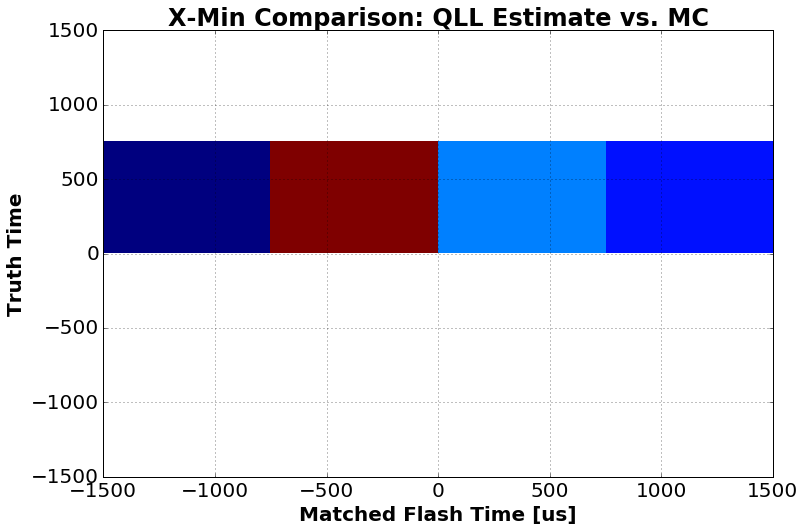

0.817629179331
mean 0.981179591078 std 0.0301216831276


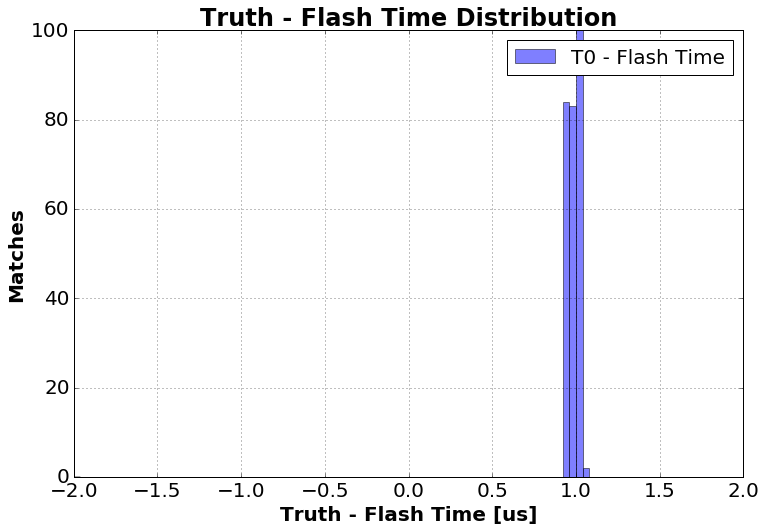

signal 269
background 60
0.817629179331


In [4]:
df = raw_df
plot_pe(df,0,1000)
plot_pediff(df,-600,600)
plot_qll(df,0,2)
plot_xxmin(df,-20,260)
#print len(raw_df.query('xmin<-20'))
plot_xcorr(df,40,0,260,40,0,260)
plot_xscorecorr(df,100,0,40,100,0,2.5)
plot_xdiff(df,-100,100)
plot_tcorr(df,4,-1500,1500,4,-1500,1500)
df = df.query('-1.5 < t and t < -0.5')
print float(len(df)) / float(len(raw_df))
plot_tdiff(df,-2,2,100)

sg_df = raw_df.query('-1.5 < t and t < -0.5')
bg_df = raw_df.query('t < -1.5 or -0.5 < t ')

print 'signal',len(sg_df)
print 'background', len(bg_df)
print len(sg_df)/float(len(sg_df)+len(bg_df))
